1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [2]:
def convert(number):
    # assuming x is a decimal integer
    # the other cases will be added later
    
    # dec->bin
    # first the sign bit
    # x_bin = ['1|'] if x<0 else ['0|']
    x_bin = ['-'] if number<0 else ['']
    x = abs(number)
    
    # then evaluate the number
    while x >= 1:
        x_bin.insert(1, str(x%2))
        x = x//2
    x_bin = ''.join(digit for digit in x_bin)
        
    print("Binary representation: ", x_bin)
    
    # dec->hex
    # is there a better way of doing this? probably
    hex_symbols = [str(i) for i in range(10)]
    hex_symbols.extend(['a', 'b', 'c', 'd', 'e', 'f'])
    
    # first the sign
    x_hex = ['-'] if number<0 else ['']
    x = abs(number)
    
    # then evaluate the number
    while x >= 1 :
        x_hex.insert(1, hex_symbols[x%16])
        x = x//16
    x_hex = ''.join(digit for digit in x_hex)
        
    print("Hexadecimal representation: ", x_hex)

In [3]:
# test
x = -159384
convert(x)
print(bin(x), hex(x))

Binary representation:  -100110111010011000
Hexadecimal representation:  -26e98
-0b100110111010011000 -0x26e98


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [4]:
def wordToFloat(x):
    
    x_float = 0.
    return x_float
    

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [5]:
# find underflow limit
x, under = 1., 0

while x > 0:
    under += 1
    x /= 2
print("underflow limit exceeded at 2^-%d" %under)    

underflow limit exceeded at 2^-1075


In [6]:
# find overflow limit
y, over = 1., 0

while y < float('inf'):
    over += 1
    y *= 2
print("overflow limit exceeded at 2^%d" %over)

overflow limit exceeded at 2^1024


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [7]:
x, y, i= 1., 2., 0

while x != y:
    y = x+2**(-i)
    i += 1
    
print("machine precision: 2^-%d" %i)

machine precision: 2^-54


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [8]:
# (a)
# define function to solve quadratic equations
def quadraticSolveA(a, b, c):
    x_1 = (-b+(b**2-4*a*c)**(-1/2))/(2*a)
    x_2 = (-b-(b**2-4*a*c)**(-1/2))/(2*a)    
    return x_1, x_2

# (b)
# define new function
def quadraticSolveB(a, b, c):
    x_1 = (-b+(b**2-4*a*c)**(-1/2))*(-b-(b**2-4*a*c)**(-1/2))/(2*a*(-b-(b**2-4*a*c)**(-1/2)))
    x_2 = (-b-(b**2-4*a*c)**(-1/2))*(-b+(b**2-4*a*c)**(-1/2))/(2*a*(-b+(b**2-4*a*c)**(-1/2)))    
    return x_1, x_2

In [9]:
a, b, c = 0.001, 1000, 0.001
print(quadraticSolveA(a, b, c))
print(quadraticSolveB(a, b, c))

(-499999.5, -500000.5)
(-499999.50000000006, -500000.49999999994)


Fehlerfortpflanzung! Not well conditioned or not numerically stable?

In [10]:
# (c)
# define new function
def quadraticSolveC(a, b, c):
    x_1 = '?'
    x_2 = '?'
    return x_1, x_2

In [11]:
a, b, c = 0.001, 1000, 0.001
print(quadraticSolveC(a, b, c))

('?', '?')


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [12]:
import matplotlib.pyplot as plt

# f(x) = x*(x-1)
def func(x): return x*(x-1)

# numerical derivative
def derivative(f, x, d): return (f(x+d)-f(x))/d

In [13]:
# (a) 
x, d = 1., 10**(-2)
print("numerical result:", derivative(func, x, d))

numerical result: 1.010000000000001


(a) The analytical derivative of $f(x) = x(x-1) = x^2-x$ is $f'(x) = \frac{{\rm d}f}{{\rm d}x} = 2x-1$, so $f'(1) = 1$. The numerical solution does not correspond accurately to the analytical result due to $\delta$ being finite, making the numerical approach an approximation.

[1.010000000000001, 1.0000999999998899, 1.0000009999177333, 1.0000000039225287, 1.000000082840371, 1.0000889005833413]


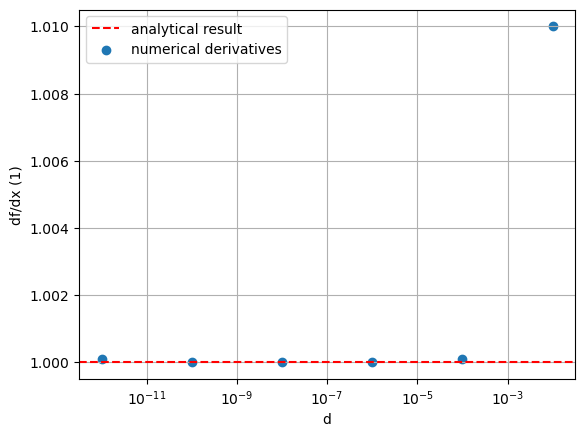

In [14]:
# (b)
d = [10**(-2*i) for i in range(1,7)]
derivatives = [derivative(func, x, elem) for elem in d]
print(derivatives)

fig, ax = plt.subplots()
plt.axhline(1, label="analytical result", color='red', ls='--')
ax.scatter(d, derivatives, label="numerical derivatives")
ax.set_xlabel("d")
ax.set_ylabel("df/dx (1)")
ax.set_xscale('log')
plt.legend()
plt.grid()
plt.show()

How does it scale with $\delta$? Look it up in the CP lecture notes...

(also maybe look up how to include LaTeX in the axis labels again...)

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [15]:
def integrate(func, uplim, lowlim, N=100):
    I = 0
    h = (uplim-lowlim)/N
    for i in range(N):
        I += h * func(lowlim+i*h)
    return I

def func(x): return (1-x**2)**(1/2)

In [23]:
# (a)
uplim, lowlim, N = 1, -1, 100
print(integrate(func, uplim, lowlim, N))

1.5691342555492505


In [27]:
import time

N, i = 100, 2
# while loop will be executed as long as a single loop does not exceed 60s
t_end = time.time() + 60
while time.time() < t_end:
    t_end = time.time() + 60
    print("N: 10^%d, I: %.10f" %(i, integrate(func, uplim, lowlim, N)))
    i+= 1
    N = 10**i
print("60s exceeded!")

N: 10^2, I: 1.5691342555
N: 10^3, I: 1.5707437385
N: 10^4, I: 1.5707946637
N: 10^5, I: 1.5707962742
N: 10^6, I: 1.5707963251
N: 10^7, I: 1.5707963267
N: 10^8, I: 1.5707963268
60s exceeded!


In [33]:
N, i = 10000, 2
# while loop will be executed as long as a single loop does not exceed 1s
t_end = time.time() + 1
while time.time() < t_end:
    t_end = time.time() + 1
    print("N: 1%d, I: %.10f" %(N, integrate(func, uplim, lowlim, N)))
    i+= 1
    N = 10000*i
print("1s exceeded!")

N: 110000, I: 1.5707946637
N: 130000, I: 1.5707960067
N: 140000, I: 1.5707961189
N: 150000, I: 1.5707961780
N: 160000, I: 1.5707962136
N: 170000, I: 1.5707962370
N: 180000, I: 1.5707962533
N: 190000, I: 1.5707962652
N: 1100000, I: 1.5707962742
N: 1110000, I: 1.5707962812
N: 1120000, I: 1.5707962868
N: 1130000, I: 1.5707962913
N: 1140000, I: 1.5707962950
N: 1150000, I: 1.5707962982
N: 1160000, I: 1.5707963008
N: 1170000, I: 1.5707963031
N: 1180000, I: 1.5707963050
N: 1190000, I: 1.5707963067
N: 1200000, I: 1.5707963082
N: 1210000, I: 1.5707963095
N: 1220000, I: 1.5707963107
N: 1230000, I: 1.5707963117
N: 1240000, I: 1.5707963127
N: 1250000, I: 1.5707963135
N: 1260000, I: 1.5707963143
N: 1270000, I: 1.5707963149
N: 1280000, I: 1.5707963156
N: 1290000, I: 1.5707963161
N: 1300000, I: 1.5707963167
N: 1310000, I: 1.5707963172
N: 1320000, I: 1.5707963176
N: 1330000, I: 1.5707963180
N: 1340000, I: 1.5707963184
N: 1350000, I: 1.5707963188
N: 1360000, I: 1.5707963191
N: 1370000, I: 1.5707963194
